<a href="https://colab.research.google.com/github/tamarasessink/Master_Thesis/blob/master/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tamarasessink/Master_Thesis.git

Cloning into 'Master_Thesis'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 94 (delta 48), reused 52 (delta 19), pack-reused 0
Unpacking objects: 100% (94/94), 249.20 KiB | 2.71 MiB/s, done.


In [3]:
import torch
model = torch.load('/content/drive/MyDrive/checkpoint_0199.pth.tar', map_location='cpu')
print(model)

{'epoch': 200, 'arch': 'resnet50', 'state_dict': OrderedDict([('module.queue', tensor([[ 0.1754,  0.0120,  0.2373,  ..., -0.0143, -0.0732,  0.0803],
        [-0.0169, -0.1075, -0.0609,  ...,  0.0293,  0.0364,  0.0060],
        [ 0.0045,  0.1483, -0.0422,  ...,  0.0360,  0.0889,  0.1925],
        ...,
        [-0.0383, -0.1552,  0.0384,  ...,  0.0388,  0.0537,  0.1211],
        [-0.1201, -0.1051, -0.0991,  ...,  0.1683, -0.0665,  0.0569],
        [ 0.1065, -0.0230,  0.1664,  ...,  0.2027, -0.1606,  0.0505]])), ('module.queue_ptr', tensor([0])), ('module.encoder_q.conv1.weight', tensor([[[[ 7.0230e-02, -4.1660e-02,  4.2025e-02,  ...,  7.0984e-03,
            1.7880e-02,  6.1800e-03],
          [-3.7125e-02,  2.1589e-02, -6.1565e-02,  ...,  2.3484e-02,
           -1.0346e-02,  9.8234e-03],
          [-6.0116e-03, -3.5639e-02,  6.6227e-02,  ...,  2.8408e-03,
           -1.8451e-02,  1.1533e-02],
          ...,
          [ 2.8007e-02, -2.9953e-02, -1.4943e-04,  ...,  7.7149e-03,
           

In [ ]:
import h5py

In [ ]:
!python /content/Master_Thesis/main_moco.py \
  --lr 0.03 \
  --batch-size 256 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \


2023-01-30 11:17:34.651956: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Use GPU: 0 for training
=> creating model 'resnet50'
MoCo(
  (encoder_q): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    

(5734, 18, 288, 288)


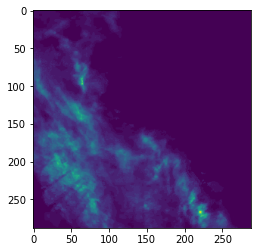

In [ ]:
import pylab as plt
import numpy as np

f = h5py.File('/content/drive/MyDrive/train_test_2016-2019_input-length_12_img-ahead_6_rain-threshhold_50.h5', "r")
traindir = f['/train/images']
print(traindir.shape)
test = np.reshape(traindir[0][17:], (288,288))
test = test*10000
plt.imshow(test)

In [ ]:
!git push https://github.com/tamarasessink/Master_Thesis.git

fatal: not a git repository (or any of the parent directories): .git


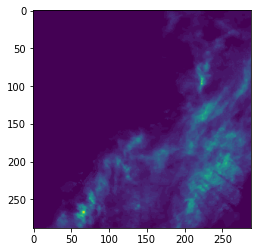

In [ ]:
import torchvision.transforms as transforms
from PIL import Image
# after agmentation
image = Image.fromarray(np.uint8(test))

transform = transforms.RandomHorizontalFlip(p=0.8)
img = transform(image)
plt.imshow(img)

mean and std before normalize:
Mean of the image: tensor([0.0188])
Std of the image: tensor([0.0278])


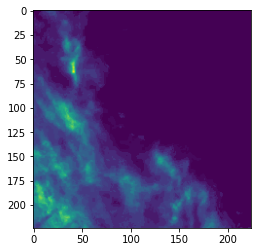

In [ ]:
import torch
# we only have 1 not 3 dimensions per image thus only 1 mean and std
transform = transforms.Compose([
    transforms.ToTensor()
])
# get tensor image
img_tr = transform(image)
# calculate mean and std
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)


normalize = transforms.Normalize(mean=[0.0188],
                                     std=[0.0278])
augmentation = [transforms.RandomResizedCrop(224, scale=(0.2, 1.)),
            transforms.RandomGrayscale(p=0.2),
            transforms.ColorJitter(0.4, 0.4, 0.4, 0.4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(), normalize]
aug = transforms.Compose(augmentation)
img = aug(image)
test2 =  torch.squeeze(img,0)
plt.imshow(test2)

